In [1]:
import gym
from gym_super_mario_bros.actions import (COMPLEX_MOVEMENT, RIGHT_ONLY, SIMPLE_MOVEMENT)

from gym.wrappers import ResizeObservation, GrayScaleObservation
from nes_py.wrappers import JoypadSpace
from mario import RecordFrames, SkipStackObservation

import cv2
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# env = gym.make('SuperMarioBros-1-1-v0', apply_api_compatibility=True)
# env = RecordFrames(env)
# env = JoypadSpace(env, COMPLEX_MOVEMENT)
# env = ResizeObservation(env, shape=42)
# env = GrayScaleObservation(env, keep_dim=False)
# env = SkipStackObservation(env, num_skip=6, num_stack=4)

In [3]:
def check_frames(env, n=4):
    print(env)
    frames = deque(maxlen=n)
    env.reset()
    for _ in range(10):
        frames.append(env.step(1)[0])
    for i in range(n):
        print(f'{i}th id: {hex(id(frames[i]))}')
    print()
    for i in range(n-1):
        print(f'{i+1}th-{i}th diff pixels: {(frames[i+1] != frames[i]).sum()}')
    
    show_images(frames)
    # return frames

def show_images(state):
    state = np.array(state)
    gray = True if len(state.shape)==3 else False
    if gray:
        s, h, w = state.shape
    else:
        s, h, w, _ = state.shape

    states = []
    for i in range(s-1): # s: 4
        states.append(state[i])
        if gray:
            states.append(np.ones((h,1))*255)
        else:
            states.append(np.ones((h,1,3), dtype=np.uint8)*255)
    states.append(state[s-1])

    if gray:
        diffs = [np.ones((h, w//2))*255]
    else:
        diffs = [np.ones((h, w//2, 3), dtype=np.uint8)*255]
    for i in range(s-1):
        diffs.append(state[i+1]-state[i])
        if gray:
            diffs.append(np.ones((h, 1))*255)
        else:
            diffs.append(np.ones((h, 1, 3), dtype=np.uint8)*255)
    if gray:
        diffs.append(np.ones((h, w//2))*255)
    else:
        diffs.append(np.ones((h, w//2, 3), dtype=np.uint8)*255)

    states = np.hstack(states)
    diffs = np.hstack(diffs)
    img = np.vstack([states, diffs])
    plt.imshow(img)

<RecordFrames<TimeLimit<OrderEnforcing<PassiveEnvChecker<EnvCompatibility<SuperMarioBrosEnv<SuperMarioBros-1-1-v0>>>>>>>
0th id: 0x7f9ae5f3f210
1th id: 0x7f9ae5f3f210
2th id: 0x7f9ae5f3f210
3th id: 0x7f9ae5f3f210

1th-0th diff pixels: 0
2th-1th diff pixels: 0
3th-2th diff pixels: 0


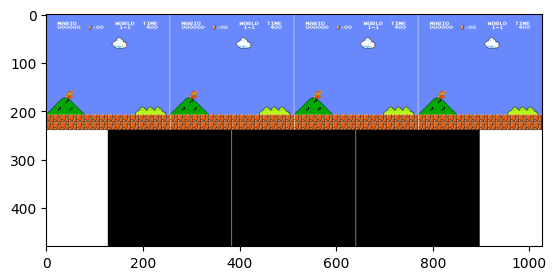

In [4]:
env = gym.make('SuperMarioBros-1-1-v0', apply_api_compatibility=True)
env = RecordFrames(env)
check_frames(env)

<JoypadSpace<RecordFrames<TimeLimit<OrderEnforcing<PassiveEnvChecker<EnvCompatibility<SuperMarioBrosEnv<SuperMarioBros-1-1-v0>>>>>>>>
0th id: 0x7f9ae5b43390
1th id: 0x7f9ae5b43390
2th id: 0x7f9ae5b43390
3th id: 0x7f9ae5b43390

1th-0th diff pixels: 0
2th-1th diff pixels: 0
3th-2th diff pixels: 0


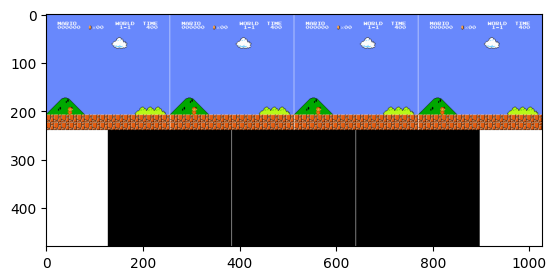

In [5]:
env = gym.make('SuperMarioBros-1-1-v0', apply_api_compatibility=True)
env = RecordFrames(env)
env = JoypadSpace(env, COMPLEX_MOVEMENT)
check_frames(env)

<ResizeObservation<JoypadSpace<RecordFrames<TimeLimit<OrderEnforcing<PassiveEnvChecker<EnvCompatibility<SuperMarioBrosEnv<SuperMarioBros-1-1-v0>>>>>>>>>
0th id: 0x7f9ae5b3bbd0
1th id: 0x7f9ae5b3bdb0
2th id: 0x7f9ae5b3b7b0
3th id: 0x7f9ae5cdb330

1th-0th diff pixels: 0
2th-1th diff pixels: 34
3th-2th diff pixels: 0


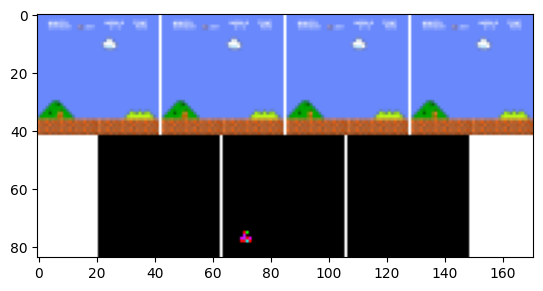

In [6]:
env = gym.make('SuperMarioBros-1-1-v0', apply_api_compatibility=True)
env = RecordFrames(env)
env = JoypadSpace(env, COMPLEX_MOVEMENT)
env = ResizeObservation(env, shape=42)
check_frames(env)

<GrayScaleObservation<ResizeObservation<JoypadSpace<RecordFrames<TimeLimit<OrderEnforcing<PassiveEnvChecker<EnvCompatibility<SuperMarioBrosEnv<SuperMarioBros-1-1-v0>>>>>>>>>>
0th id: 0x7f9ae5b3b210
1th id: 0x7f9ae5b3b990
2th id: 0x7f9ae5b3bdb0
3th id: 0x7f9ae5b3b7b0

1th-0th diff pixels: 0
2th-1th diff pixels: 11
3th-2th diff pixels: 0


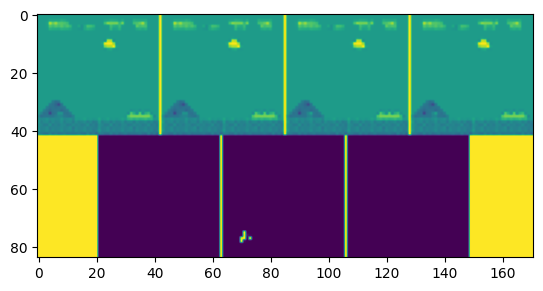

In [7]:
env = gym.make('SuperMarioBros-1-1-v0', apply_api_compatibility=True)
env = RecordFrames(env)
env = JoypadSpace(env, COMPLEX_MOVEMENT)
env = ResizeObservation(env, shape=42)
env = GrayScaleObservation(env, keep_dim=False)
check_frames(env)

<SkipStackObservation<GrayScaleObservation<ResizeObservation<JoypadSpace<RecordFrames<TimeLimit<OrderEnforcing<PassiveEnvChecker<EnvCompatibility<SuperMarioBrosEnv<SuperMarioBros-1-1-v0>>>>>>>>>>>
0th id: 0x7f9ae5cdb750
1th id: 0x7f9ae5ed3090
2th id: 0x7f9ae5df9c90
3th id: 0x7f9ae5e13150

1th-0th diff pixels: 0
2th-1th diff pixels: 11
3th-2th diff pixels: 0


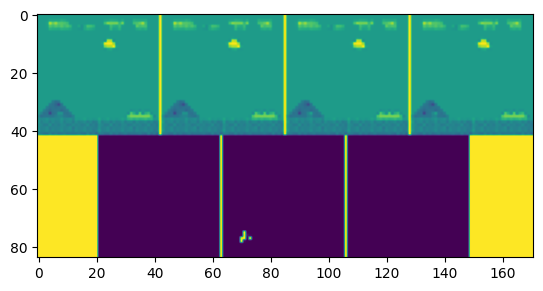

In [8]:
# check something
env = gym.make('SuperMarioBros-1-1-v0', apply_api_compatibility=True)
env = RecordFrames(env)
env = JoypadSpace(env, COMPLEX_MOVEMENT)
env = ResizeObservation(env, shape=42)
env = GrayScaleObservation(env, keep_dim=False)

# num_stack=1 for using check_frames
env = SkipStackObservation(env, num_skip=1, num_stack=1)
check_frames(env)

<SkipStackObservation<GrayScaleObservation<ResizeObservation<JoypadSpace<RecordFrames<TimeLimit<OrderEnforcing<PassiveEnvChecker<EnvCompatibility<SuperMarioBrosEnv<SuperMarioBros-1-1-v0>>>>>>>>>>>
0th id: 0x7f9ae5c873f0
1th id: 0x7f9ae5c872d0
2th id: 0x7f9ae5c7e4b0
3th id: 0x7f9ae5c96a50

1th-0th diff pixels: 15
2th-1th diff pixels: 17
3th-2th diff pixels: 330


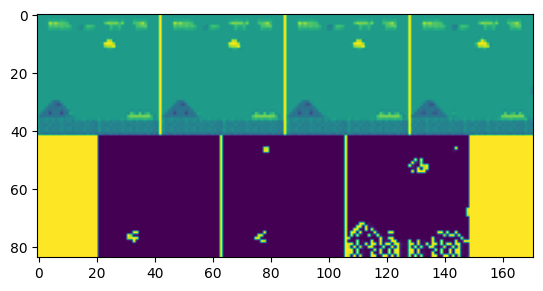

In [9]:
env = gym.make('SuperMarioBros-1-1-v0', apply_api_compatibility=True)
env = RecordFrames(env)
env = JoypadSpace(env, COMPLEX_MOVEMENT)
env = ResizeObservation(env, shape=42)
env = GrayScaleObservation(env, keep_dim=False)

# num_stack=1 for using check_frames
env = SkipStackObservation(env, num_skip=4, num_stack=1)
check_frames(env)

<SkipStackObservation<ResizeObservation<JoypadSpace<RecordFrames<TimeLimit<OrderEnforcing<PassiveEnvChecker<EnvCompatibility<SuperMarioBrosEnv<SuperMarioBros-1-1-v0>>>>>>>>>>
0th id: 0x7f9ae5c87cf0
1th id: 0x7f9ae5c7ebd0
2th id: 0x7f9ae5c7ee10
3th id: 0x7f9ae5b25270

1th-0th diff pixels: 43
2th-1th diff pixels: 52
3th-2th diff pixels: 964


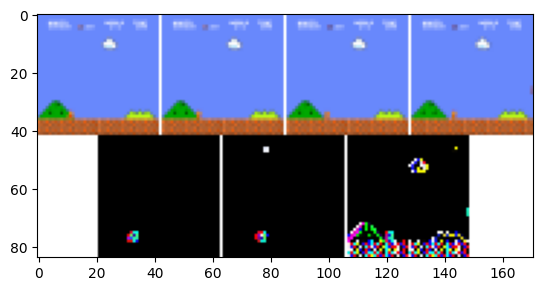

In [10]:
# check something
env = gym.make('SuperMarioBros-1-1-v0', apply_api_compatibility=True)
env = RecordFrames(env)
env = JoypadSpace(env, COMPLEX_MOVEMENT)
env = ResizeObservation(env, shape=42)
env = SkipStackObservation(env, num_skip=4, num_stack=1)
check_frames(env)

In [11]:
# check cv2.resize
img = np.random.randn(240, 256, 3)
before = img
print(f'id(before): {hex(id(before))}, {before.data}')

def change_img(img): # inplace operator
    img -= 1
    img[0][0] = [1, 2, 3]
    return img

img = change_img(img)
after = img
print(f'id(after) : {hex(id(after))}, {after.data}')

id(before): 0x7f9ae5df1b70, <memory at 0x7f9ae5f77d60>
id(after) : 0x7f9ae5df1b70, <memory at 0x7f9ae5f77d60>


In [12]:
# check cv2.resize
img = np.random.randn(240, 256, 3)
before = img
print(f'id(before): {hex(id(before))}, {before.data}')

def change_img(img):
    img -= 1
    img[0][0] = [1, 2, 3]
    img = cv2.resize(img, (42, 42)) # add this
    return img

img = change_img(img)
after = img
print(f'id(after) : {hex(id(after))}, {after.data}')

id(before): 0x7f9ae5ed30f0, <memory at 0x7f9ae5f77d60>
id(after) : 0x7f9ae5ea9570, <memory at 0x7f9ae5f77d60>
